In [4]:
!pip install opencv-python-headless


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install protobuf==3.20.0


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
from keras.applications.vgg16 import VGG16
import cv2

In [10]:
path = "/home/studio-lab-user/image_similarity_BP"

In [11]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import glob

# Load the VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

prediction_images = glob.glob(path + "/prediction_images/*")
test_images = glob.glob(path + "/reference_images/*")

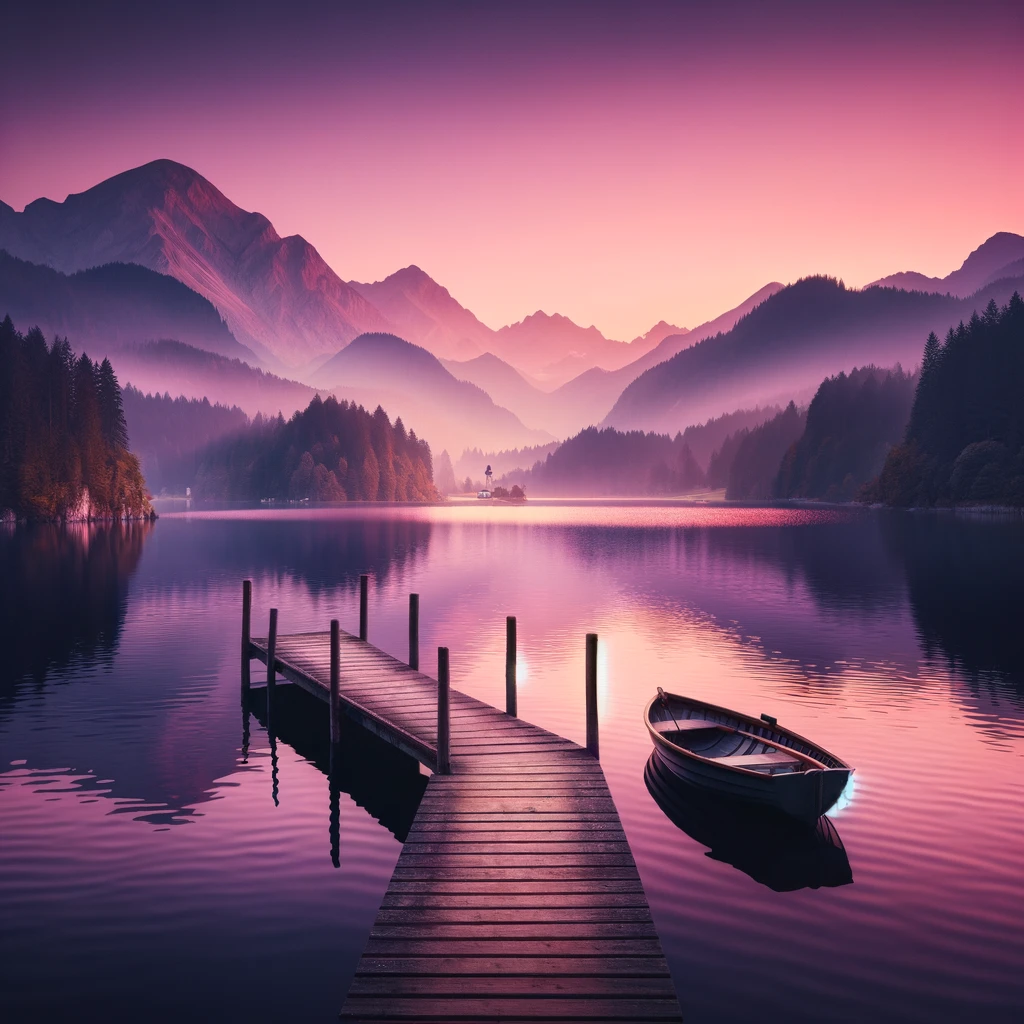

In [12]:
import glob
from PIL import Image

reference_images = glob.glob(path + "/reference_images/*")
for reference_image in reference_images:
    image_show = Image.open(reference_image)
    image_show.show()

In [13]:
for test_img in test_images:
    test_image = cv2.imread(test_img)

    img2 = preprocess_input(test_image)
    img2 = np.expand_dims(img2, axis=0)
    img2_features = vgg16_model.predict(img2)
    img2_features = np.ravel(img2_features)

    for prediction_img in prediction_images:
        prediction_image = cv2.imread(prediction_img)
        img1 = preprocess_input(prediction_image)
        img1 = np.expand_dims(img1, axis=0)
        img1_features = vgg16_model.predict(img1)
        img1_features = np.ravel(img1_features)
        
        similarity = cosine_similarity(img1_features.reshape(1, -1), img2_features.reshape(1, -1))
        print(prediction_img[-20:], test_img[-20:], similarity)

1/1 [==============================] - 4s 4s/step
on_images/image2.png ce_images/image1.png [[1.]]
1/1 [==============================] - 4s 4s/step
on_images/image3.png ce_images/image1.png [[0.89481366]]
